In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import numpy as np
from scipy import stats
from itertools import product
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('raw_data.csv', delimiter=';')

In [3]:
df.head(5)
# Date has strange frequency

,Date,US10YR,SPX,JPY,GOLD,GBP,AUD,CAD,OIL,MXWO,GABI,GABIHY,VIX
0,2009-01-30,2.8403,822.50,89.92,927.85,1.2813,0.6375,1.2296,45.88,838.83,351.900,1413.102,44.84
1,2009-02-06,2.9917,867.75,91.90,911.50,1.2940,0.6753,1.2193,46.21,870.74,350.346,1386.344,43.37
2,2009-02-13,2.8894,820.00,91.93,941.70,1.2862,0.6568,1.2354,44.81,837.02,348.868,1407.818,42.93
3,2009-02-20,2.7879,769.50,93.35,992.90,1.2826,0.6454,1.2520,41.89,772.84,364.816,1453.929,49.30
4,2009-02-27,3.0131,734.25,97.58,942.32,1.2669,0.6390,1.2763,46.35,750.86,363.345,1494.040,46.35


In [4]:
df.describe()

,US10YR,SPX,JPY,GOLD,GBP,AUD,CAD,OIL,MXWO,GABI,GABIHY,VIX
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.00000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,2.506998,1776.406724,99.838257,1309.445096,1.257120,0.86642,1.150262,80.014579,1536.797222,156.045004,572.234759,18.150307
std,0.598932,565.797699,14.010672,206.426140,0.118769,0.12168,0.136598,25.922788,343.724221,46.976228,179.092420,7.296396
min,1.357900,687.750000,75.820000,868.850000,1.045100,0.63750,0.945100,28.940000,697.500000,95.727000,383.000000,9.140000
25%,2.029100,1282.875000,87.850000,1195.805000,1.139175,0.75700,1.023200,55.892500,1246.317500,130.377250,461.431250,13.105000
50%,2.451500,1829.875000,101.620000,1274.210000,1.276200,0.86775,1.103550,76.660000,1602.795000,143.810000,524.697000,16.045000
75%,2.900375,2124.312500,111.405000,1376.272500,1.353750,0.97655,1.291350,107.705000,1751.072500,165.711000,618.256250,21.237500
max,3.944600,2943.000000,125.630000,1882.960000,1.500800,1.09930,1.454100,126.650000,2248.930000,389.428000,1601.668000,49.330000


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [6]:
y=df['SPX']
y=y.asfreq(freq='7D')
X=df.iloc[:,df.columns!='SPX']

Text(0, 0.5, 'SPX rolling window')

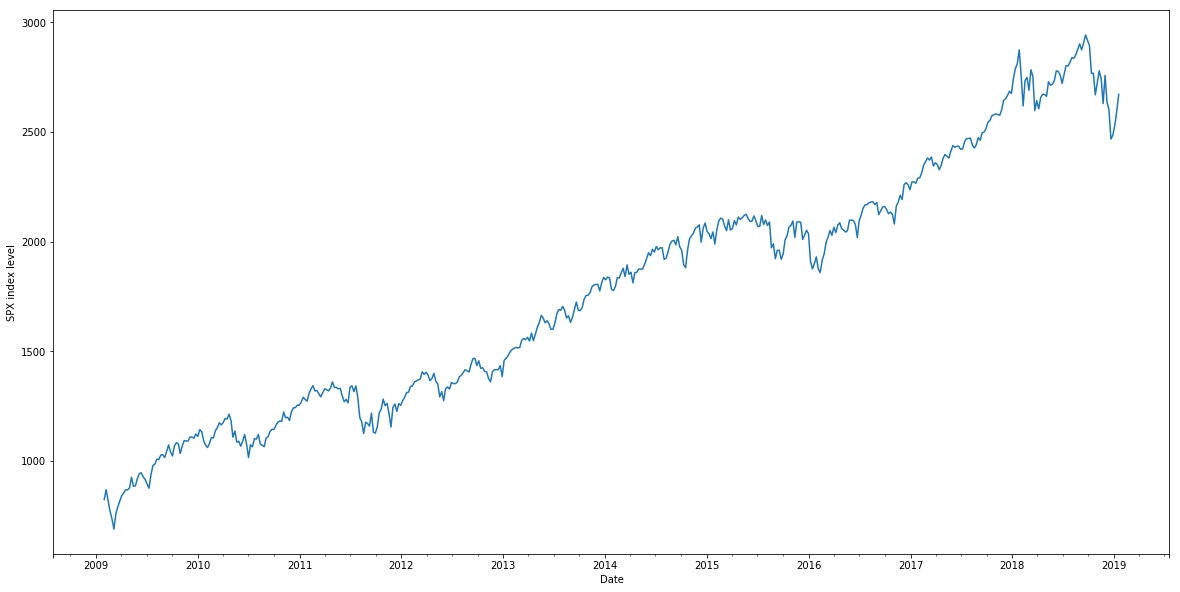

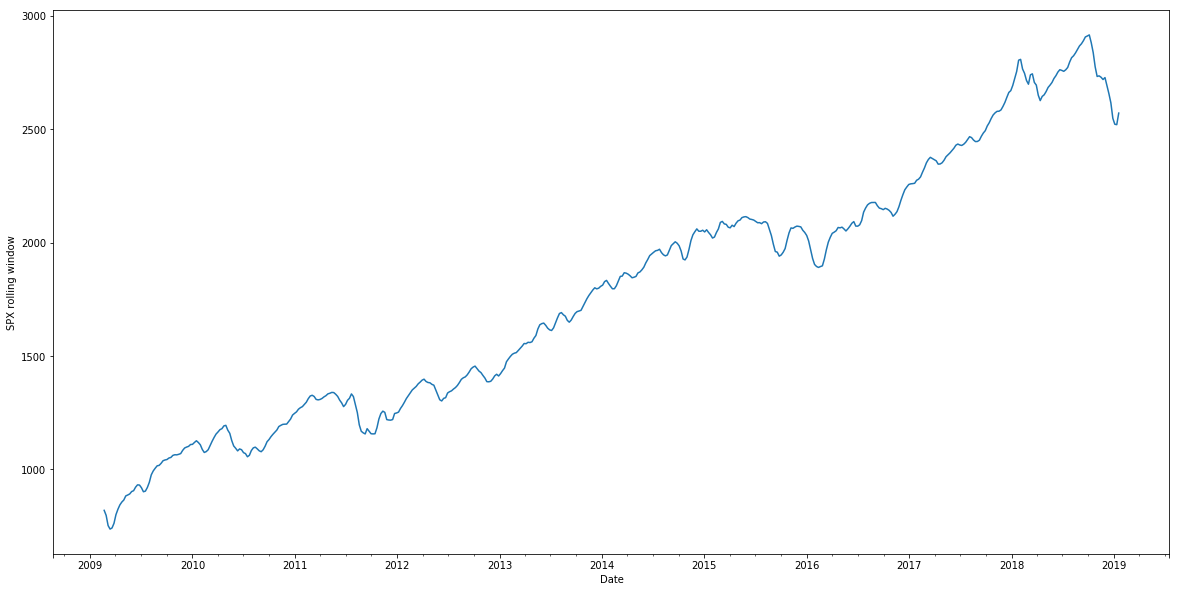

In [7]:
plt.figure(1,figsize=(20,10))
y.plot()
plt.ylabel('SPX index level')
# ряд нестационарный
# присутствует тренд, можно сделать 1st difference
# что с сезоннойстью???

plt.figure(2,figsize=(20,10))
y.rolling(4).mean().dropna().plot()
plt.ylabel('SPX rolling window')
# 4 weeks rolling window

In [8]:
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])
# ADF null не отвергаем, ряд нестационарный

Критерий Дики-Фуллера: p=0.791700


Критерий Дики-Фуллера: p=0.304114


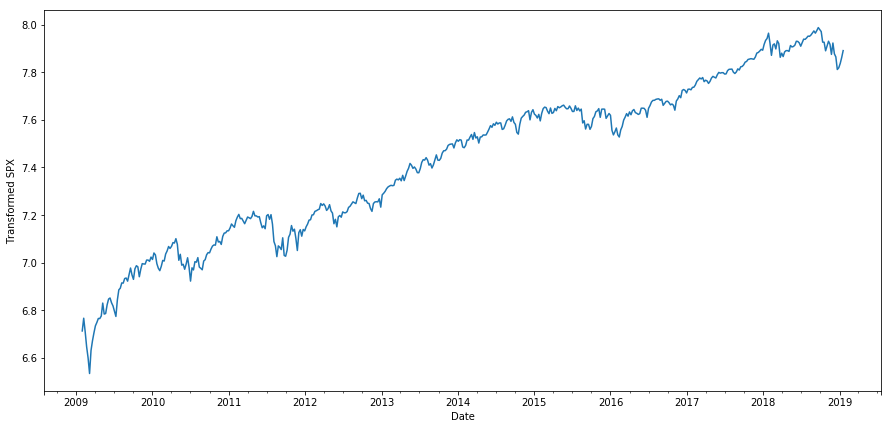

In [9]:
y_log = np.log1p(y)
plt.figure(figsize=(15,7))
y_log .plot()
plt.ylabel(u'Transformed SPX')
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y_log)[1])
# Прологарифмировав получили, что ряд все еще нестационарен

Seasonal Decomposition

Критерий Дики-Фуллера: p=0.791700


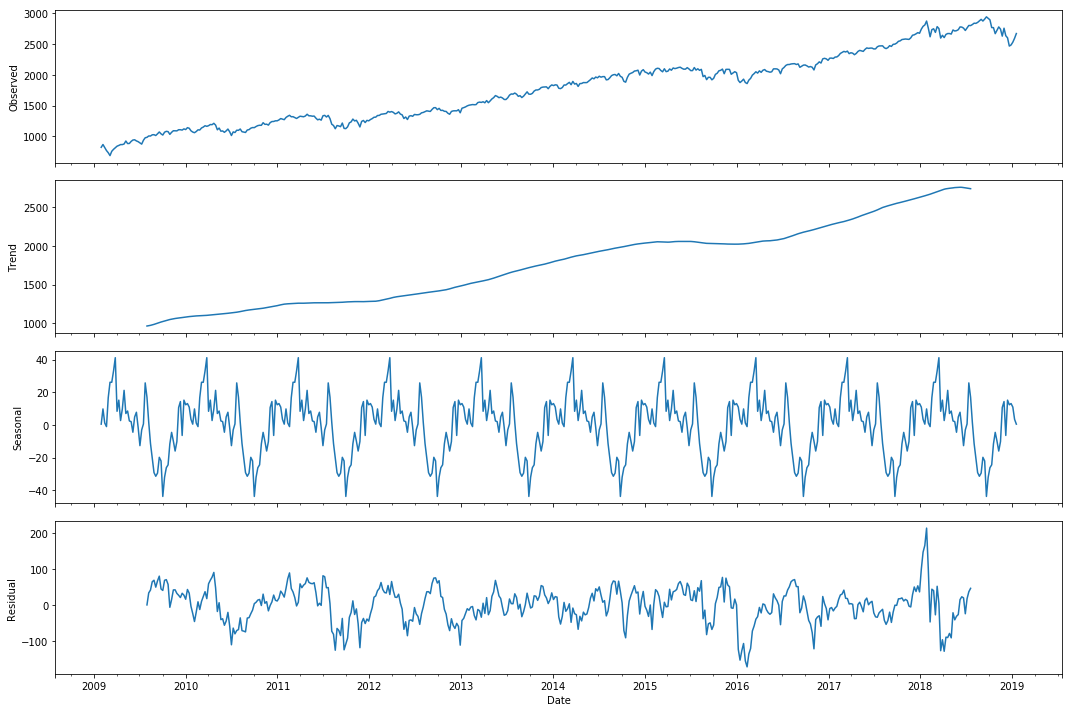

In [41]:
figsize(15,10)
sm.tsa.seasonal_decompose(y).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

# ок, есть тренд
# а как интерпретировать разложение с сезоном???

Критерий Дики-Фуллера: p=0.590398


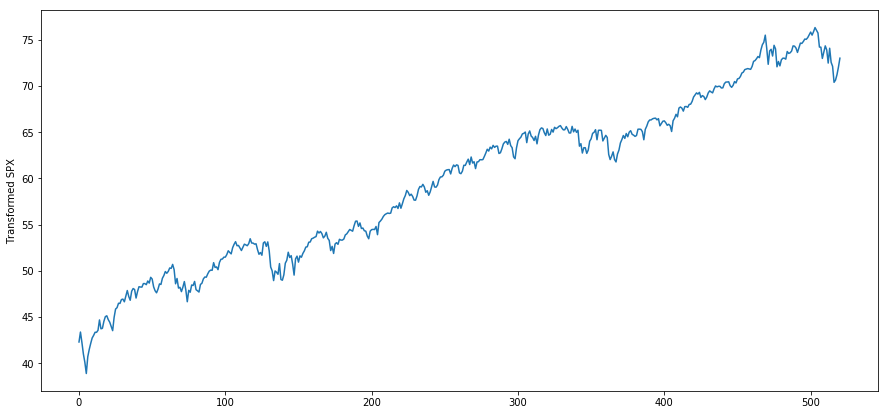

In [10]:
y_box, lmbda = stats.boxcox(y)
plt.figure(figsize=(15,7))
plt.plot(y_box)
plt.ylabel(u'Transformed SPX')
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y_box)[1])
# BoxCox трансформация тоже не помогает

Критерий Дики-Фуллера: p=0.000000
KPSS test: p=0.100000


C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


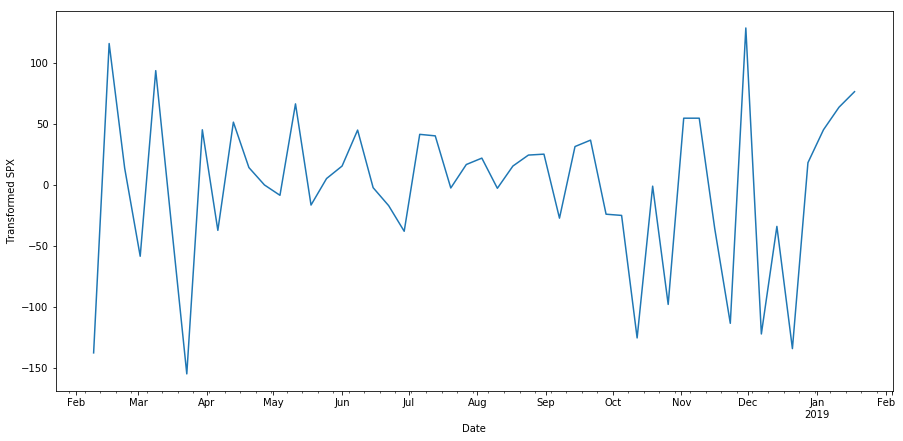

In [47]:
y_diff = y - y.shift(1)
# current - previous
plt.figure(figsize=(15,7))
y_diff[-50:].plot()
plt.ylabel(u'Transformed SPX')
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y_diff[1:])[1])
print("KPSS test: p=%f" % sm.tsa.stattools.kpss(y_diff[1:])[1])
# ряд становится стационарен после первой разности
# потому что recejt ADF null and fail to reject KPSS test
# SARIMA похоже не нужна? т.к. ряд стал стационарен, нету меняющейся ковар матрицы зависящей от времени?

ACF PACF

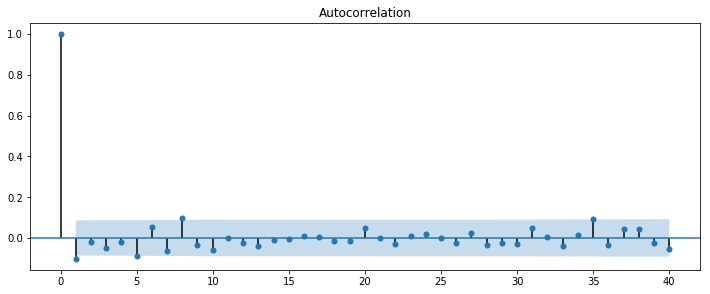

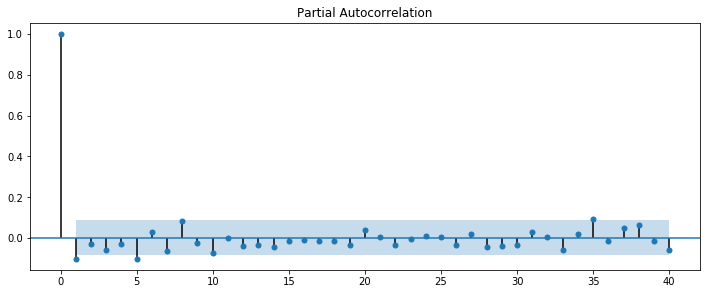

In [12]:
fig = plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(y_diff[1:].values.squeeze(), lags=40, ax=ax)
pylab.show()


fig = plt.figure(figsize=(12,10))
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(y_diff[1:].values.squeeze(), lags=40, ax=ax)
pylab.show()

# seems like no significant lags

Ljung-Box can also be used to test for stationarity (Null is that lags autocorellation are 0)

In [13]:
p=d=q=range(0,3)
pdq=list(product(p,d,q))
#generating parameter combination for ARIMA

In [14]:
%%time
results = []
best_aic = float("inf")
# setting to infinity to get first aic into the aic list for comparison
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model=sm.tsa.ARIMA(y_diff[1:510],order=(param[0], param[1],param[2])).fit()
    except ValueError:
        print('wrong parameters: ', param)
        # if arima doesn't learn, skip
        continue
    aic=model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

# for TS analysis, usually the training data is used

wrong parameters:  (0, 1, 2)
wrong parameters:  (0, 2, 2)
wrong parameters:  (1, 0, 2)
wrong parameters:  (1, 2, 1)
wrong parameters:  (1, 2, 2)
wrong parameters:  (2, 2, 1)
wrong parameters:  (2, 2, 2)
Wall time: 2.79 s


In [15]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

   parameters          aic
8   (1, 0, 1)  5014.801896
14  (2, 0, 1)  5016.357994
15  (2, 0, 2)  5017.133587
1   (0, 0, 1)  5019.731800
10  (1, 1, 1)  5019.732356


Критерий Колмогорова-Смирнова: p=0.000000
Критерий Дики-Фуллера: p=0.000000


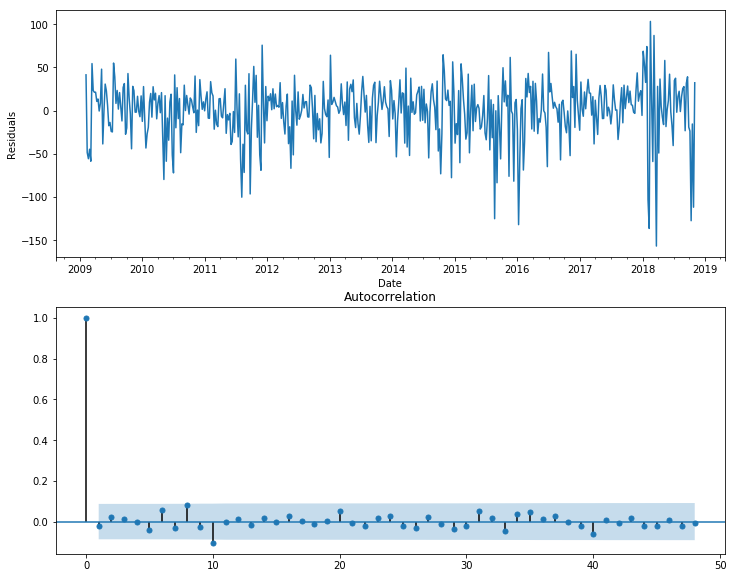

In [25]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
best_model.resid.plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid.values.squeeze(), lags=48, ax=ax)

print("Критерий Колмогорова-Смирнова: p=%f" % stats.kstest(best_model.resid.values, 'norm')[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

In [43]:
best_model.resid.describe()

count    509.000000
mean      -0.023104
std       33.128896
min     -156.895274
25%      -16.806910
50%        3.892255
75%       20.804589
max      103.228648
dtype: float64

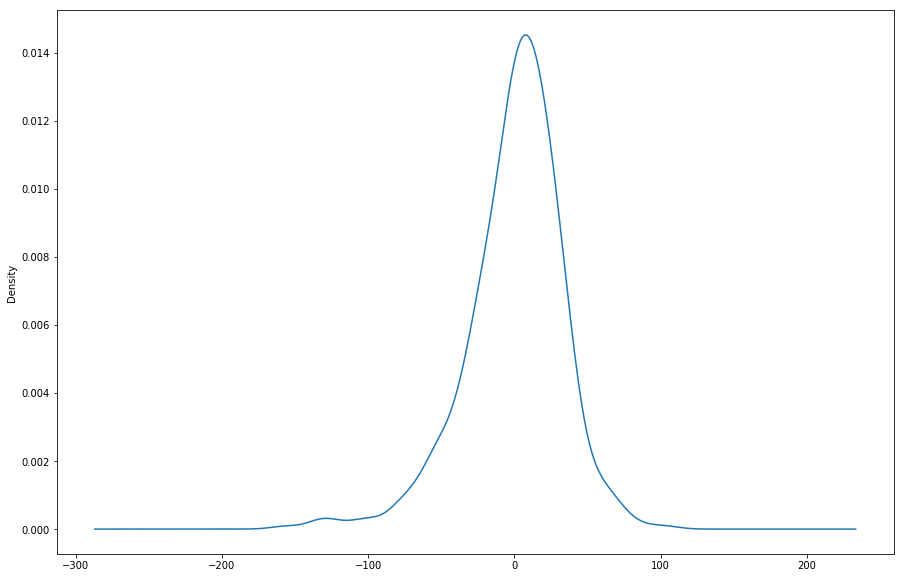

In [44]:
best_model.resid.plot(kind='kde')
# error are almost normaly distributed(slight negative skewness)

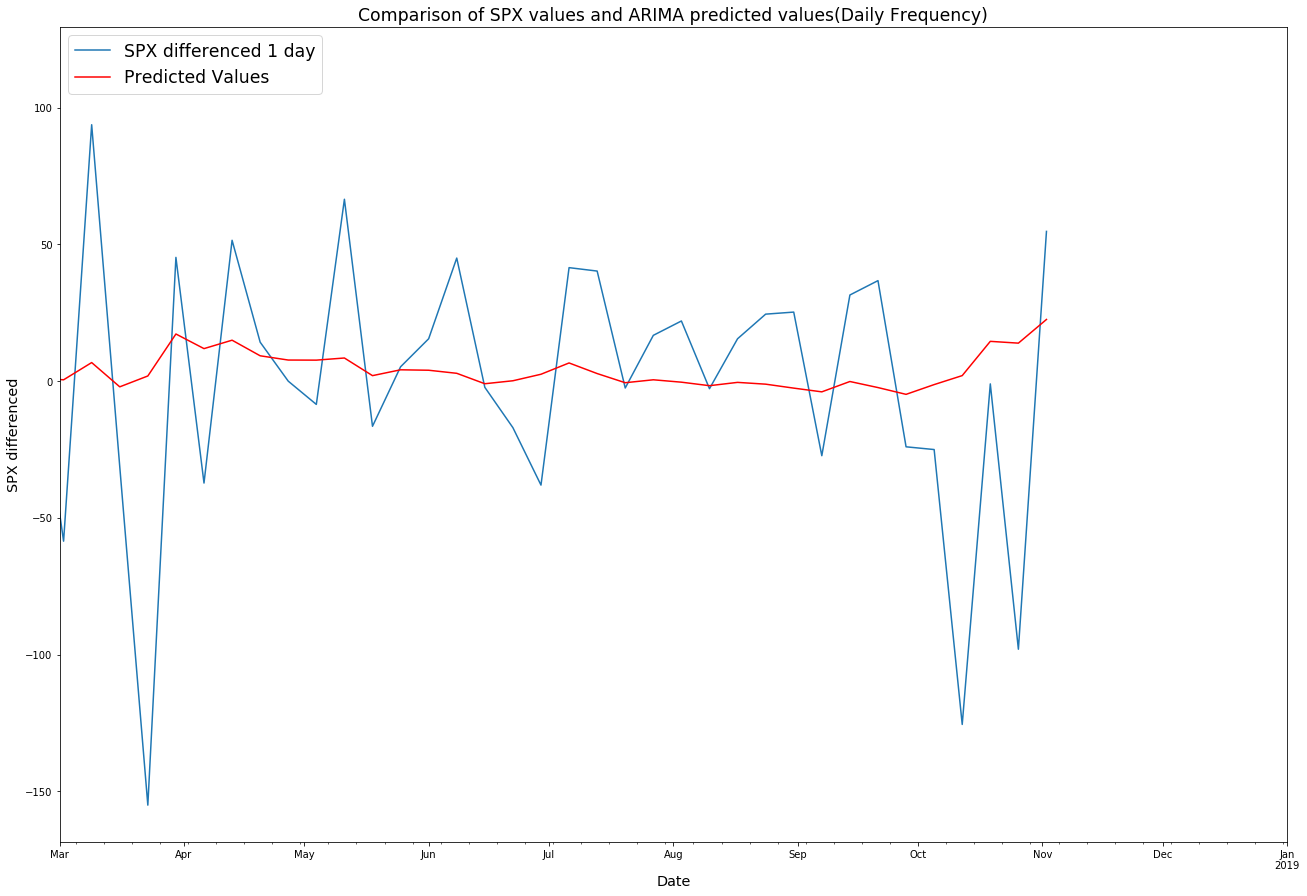

In [20]:
plt.figure(figsize=(22,15))
y_model = (best_model.fittedvalues)
y_diff[1:510].plot(label='SPX differenced 1 day')
y_model.plot(color='r', label='Predicted Values')

pylab.title('Comparison of SPX values and ARIMA predicted values(Daily Frequency)', fontsize='xx-large')
plt.legend(loc='upper left', fontsize='xx-large')
plt.xlabel('Date',fontsize='x-large')
plt.ylabel('SPX differenced', fontsize='x-large')
plt.xlim('2018-03','2019-01')
pylab.show()

# what the???

In [23]:
np.sqrt(mean_squared_error(y_diff[1:510],y_model))
# RMSE

33.096344636131576

**Предсказание будущего**

In [26]:
best_model=sm.tsa.ARIMA(y_diff[1:510], order=(1, 0, 1)).fit(disp=-1) 
#обучим на части выборки
# total 520 non-null observations in y_diff

In [30]:
date_list = [datetime.datetime.strptime("2018-11-09", "%Y-%m-%d") + relativedelta(weeks=x) for x in range(0,11)]
future = pd.DataFrame(index=date_list, columns = ['Weekly SPX'])
# create table for forecasted values

y_ft = best_model.predict(start=509, end=519) + y.shift(1)[510:]
future.iloc[:,0]=y_ft
# fill the table with predicted values

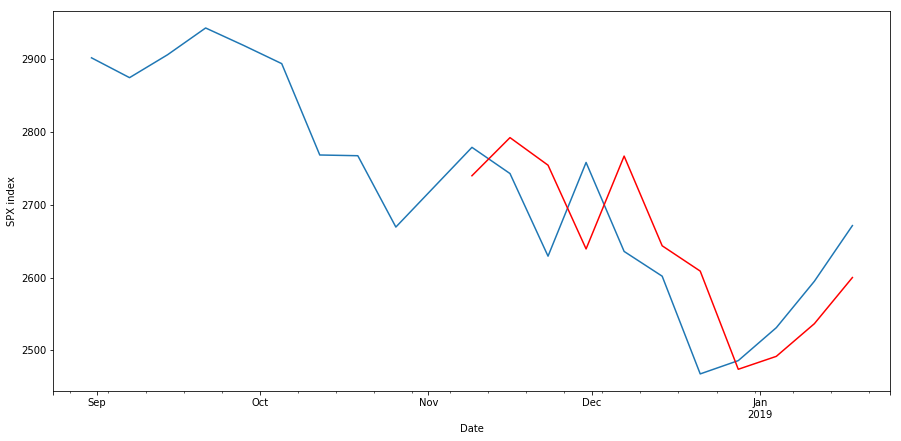

In [40]:
fig=plt.figure(figsize(15,7))
y[500:].plot()
y_ft.plot(color='r')
plt.ylabel('SPX index')
pylab.show()
fig.savefig('ARIMA.pdf', bbox_inches='tight')

In [33]:
np.sqrt(mean_squared_error(y[510:],y_ft))
# RMSE of only 86 ??????

86.7179377462373

То есть если есть данные this week's SPX last price, то мы можем почти точно угадать движение SPX last price следующей недели 

<br> Почему ошибка на тренинговых данных как будто на много больше???